# Heart Disease Prediction with ML

In this notebook, machine learning algorithms are explored to accurately predict whether a patient suffer from heart disease. The data used for this project is relatively small, and can be downloaded from [here](https://www.kaggle.com/ronitf/heart-disease-uci), courtesy- [UCI Heart Disease dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease).

We are going to explore the dataset, observe the significance as well as trends of each variable with respect to the target variable - and observe the performance of different ML algorithms by training them on identical datasets.


## SETUP

Setting up the environment by importing required libraries and loading the dataset.

In [34]:
import seaborn as seas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
seas.set_style("whitegrid")
plt.style.use("fivethirtyeight")

Loading the dataset (available in repository) and observing its contents.

In [35]:
dataset = pd.read_csv("HeartDisease_Dataset.csv")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The ditribution of the target/lable variable:
* Has Heart Disease (target = 1)
* Does not have Heart Disease (target = 0)

## Getting to know the data better

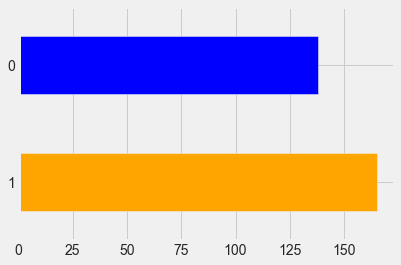

In [36]:
dataset.target.value_counts().plot(kind = "barh", color = ["orange", "blue"])

In this dataset, we have:
* 138 cases without heart disease (target = 0)
* 165 cases with heart disease (target = 1)

Here is a brief description of the dataset and its various fields: (14 columns,  303 data records)

* age      - age of the patient 
* sex      - gender of the patient
* cp       - chest pain: has 4 distinct values
* trestbps - resting blood pressure 
* chol     - serum cholesterol in mg/dl
* fbs      - fasting blood sugar: whether it is greater than 120 mg/dl or not
* restecg  - resting electrocardiographic results: has 3 distinct values:: 0, 1, 2
* thalach  - maximum heart rate achieved
* exang    - exercise induced angina
* oldpeak  - ST depression induced by exercise relative to rest
* slope    - the slope of the peak exercise ST segment
* ca       - number of major blood vessels (0 - 3) colored by flouroscopy
* thal     - values: 3 - normal , 6 - fixed defect , 7 - reversible effect
* target   - label variable for supervised learning: 0 - patient does not have heart disease ; 1 - patient has heart disease


Check for null/void data records so that necessary imputations can be done. 

In [37]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No imputations are necessary as there are no empty/void records.

Checking for the type of data contained in each field. Although described earlier, it is always better to take a look. Particularly, which fields contain categorical data, real value/ floating point values or string/character values.

In [38]:
# function definition for taking a look at the distinct variety of data under each field 
def data_viewer(df):
    category_field = [] # fields of categorical kind
    real_field = [] # fields of continuous/ real values
    for col in df.columns:
        if (len(df[col].unique()) <= 10 ): # setting 10 as threshold for unique kind of values -> category_field
            category_field.append(str(col))
        else:
            real_field.append(str(col))
    return (category_field, real_field)

In [39]:
category_columns, realValue_columns = data_viewer( dataset )
print("Category Columns: {}".format(category_columns))
print("realValue Columns: {}".format(realValue_columns))

Category Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
realValue Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


The dataset has:
- 9 fields containing categorical data: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target'
- 5 fields containing real value data: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'

### Observing the trends in the Categorical fields wrt Target variable



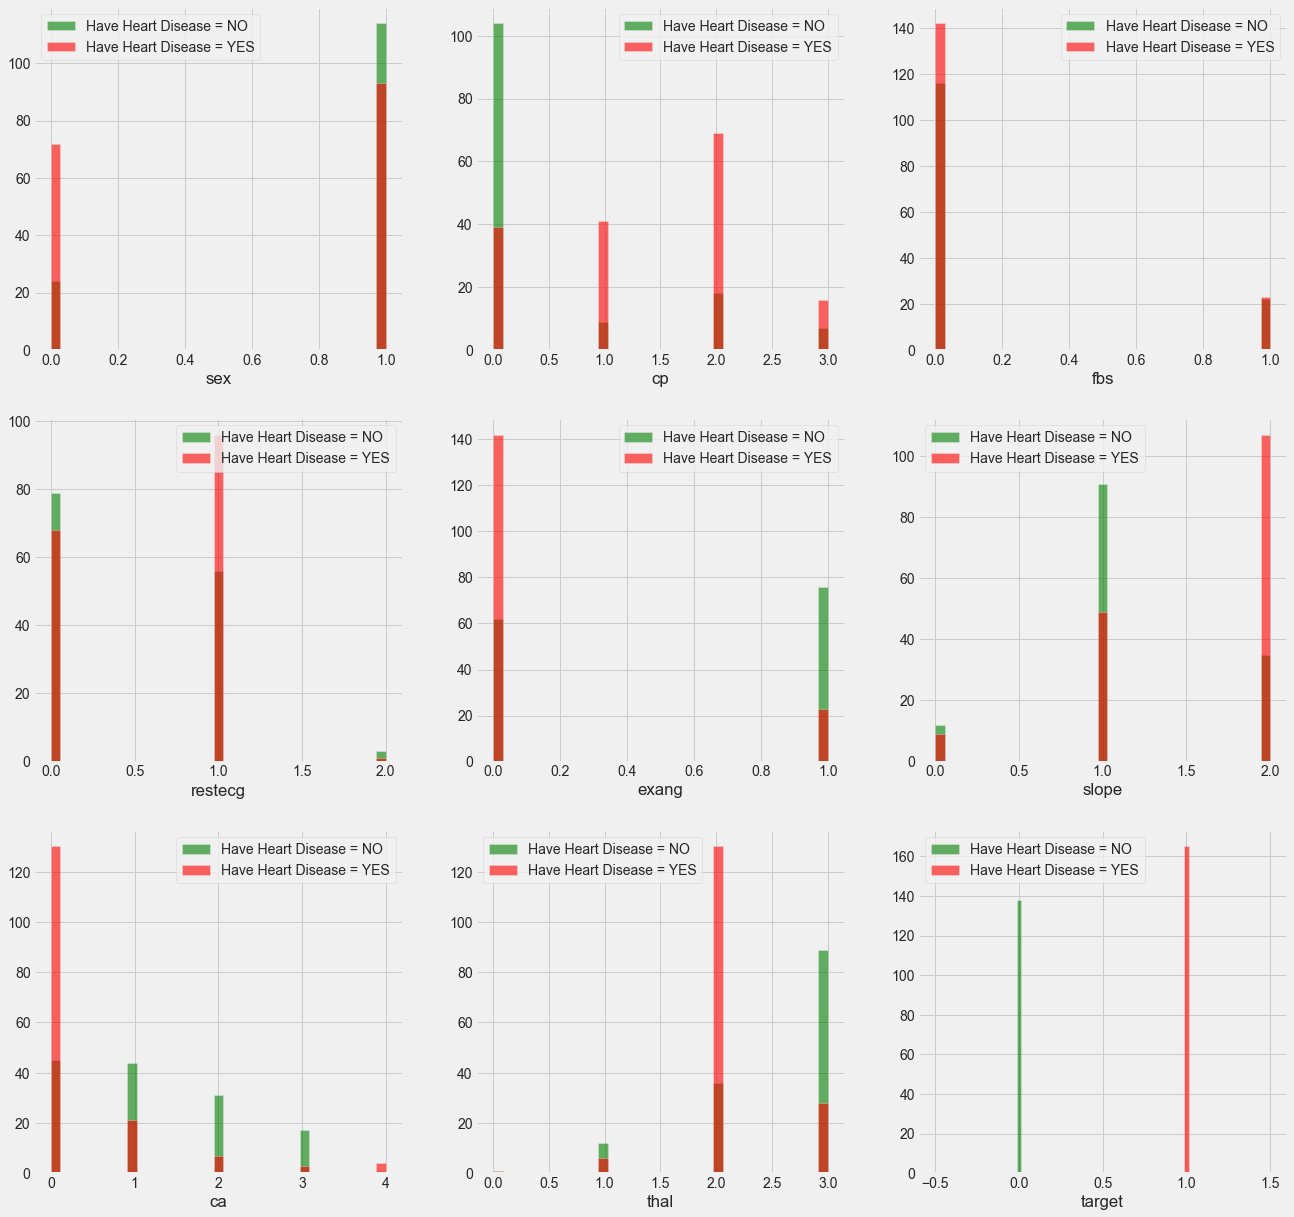

In [40]:
plt.figure(figsize = (20, 20))

for x, cat_col in enumerate( category_columns, 1):
    plt.subplot(3, 3, x)
    dataset[dataset["target"] == 0][cat_col].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["target"] == 1][cat_col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(cat_col)

#### Observations:
- cp (Chest pain): Patients with values 1, 2, 3 have a higher chance of heart disease.

- restecg (resting ECG): value of 1 - abnormal heart rhythm - having highest chance of heart disease compared to other values.

- exang (exercise-induced angina): patients of value 0 (No angina by exercise) have have higher chances of heart disease rather than those of value 1.

- slope {the slope of the ST segment of peak exercise}: Patients with value 2 - are more likely to have heart disease than those with value of 0 or 1.

- ca (no. of major vessels stained by fluoroscopy): Patients with value 0 have the highest chance of heart disease.

- thal: patients with value of 2 are at more risk of developing heart disease.

### Observing trends in the fields with Real value wrt Target variable

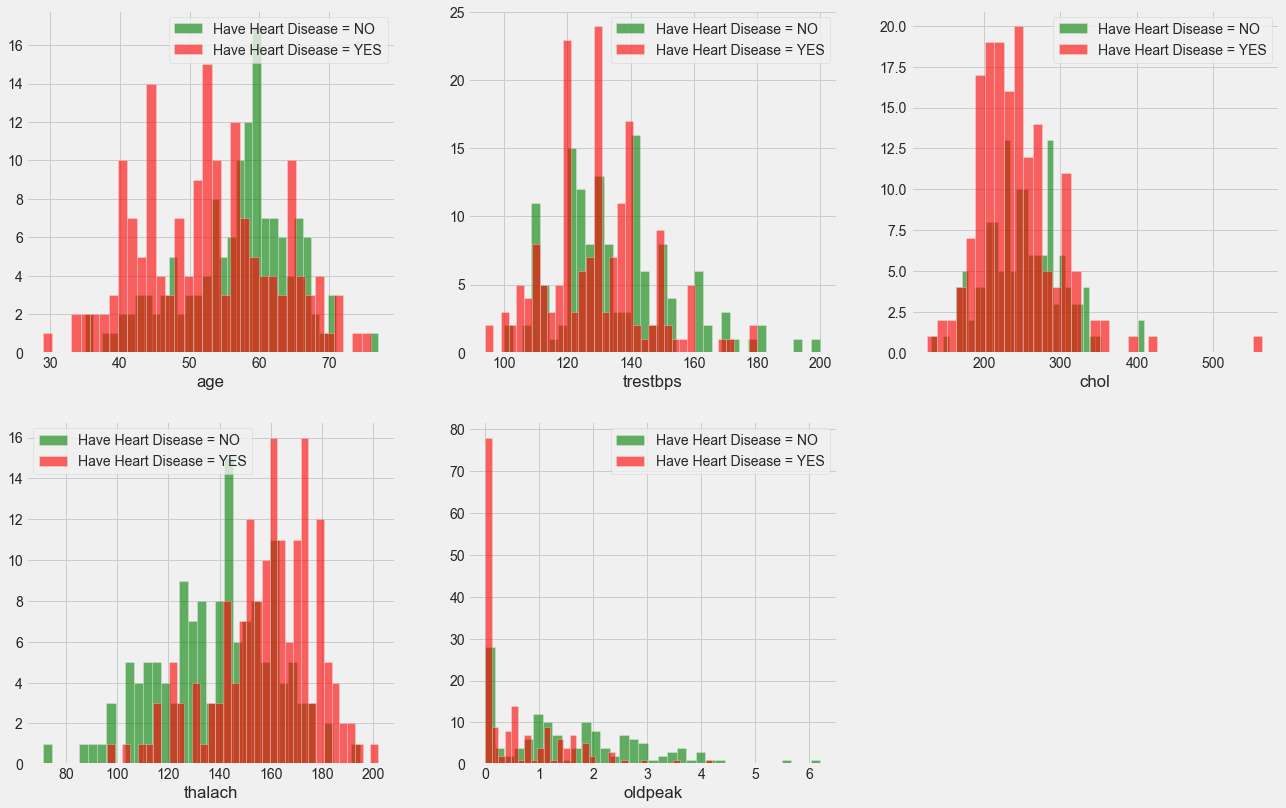

In [41]:
plt.figure(figsize = (20, 20))

for x, r_col in enumerate(realValue_columns, 1):
    plt.subplot(3, 3, x)
    dataset[dataset["target"] == 0][r_col].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["target"] == 1][r_col].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(r_col)

## Observing Overall trends wrt to multiple variables

To get a better idea of the inter-relationship of the different variables and how their combined effect realte to the target variable, its a good practice to observe the correlation between the variables.

(14.0, 0.0)

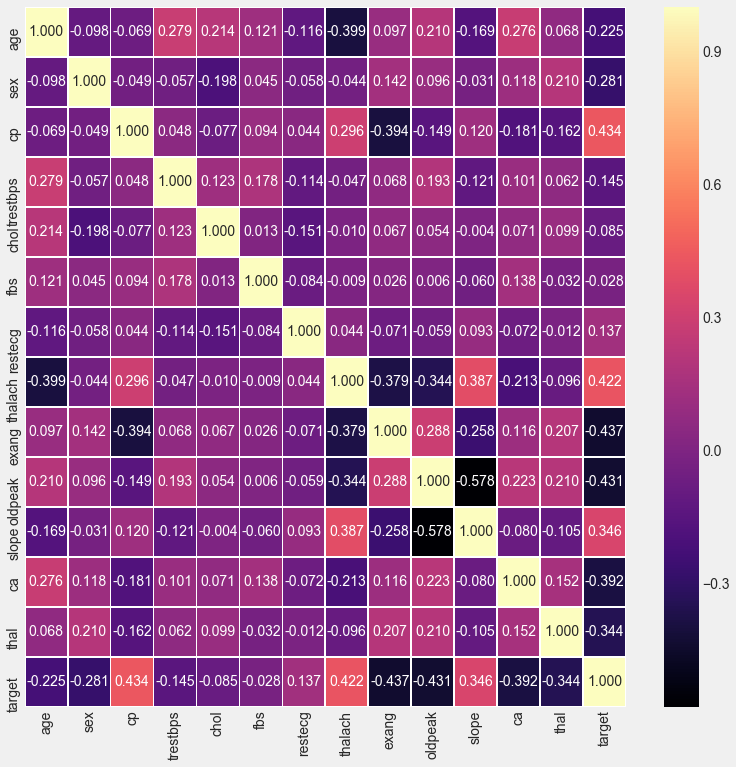

In [42]:
# plot a correlation matrix to get an
# idea of the inter-relationship between fields

correlationMatrix = dataset.corr()

fig, axes = plt.subplots(figsize=(12, 12))
axes = seas.heatmap( correlationMatrix, annot = True, linewidths = 0.75, fmt=".3f", cmap="magma");

lowerEdge, upperEdge = axes.get_ylim()
axes.set_ylim(lowerEdge + 0.5, upperEdge - 0.5)

The above heatmap illustrates the correlation between the various variables. Relatively, strong +ve correlations are observed between the following:

- thalach :: target
- slope :: target

Relatively strong -ve correlations are observed between the following:

- exang :: target
- oldpeak :: target

The below graph summarizes the correlation of the raw-variables with the target variable.

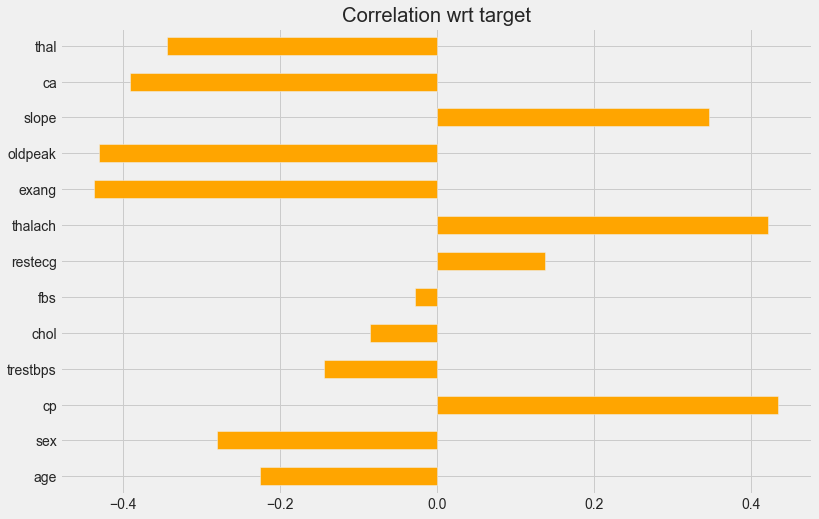

In [43]:
# correlation wrt to Target variable
dataset.drop('target', axis = 1).corrwith(dataset.target).plot(kind = 'barh', grid = True, figsize = (12, 8), title = "Correlation wrt target", color = "orange")

Most variables depict a negative correlation with the target variable.
Variables 'thalach', 'restecg', 'cp' show a positive correlation.

## Observing trends in variables wrt +ve and -ve cases of Heart Disease

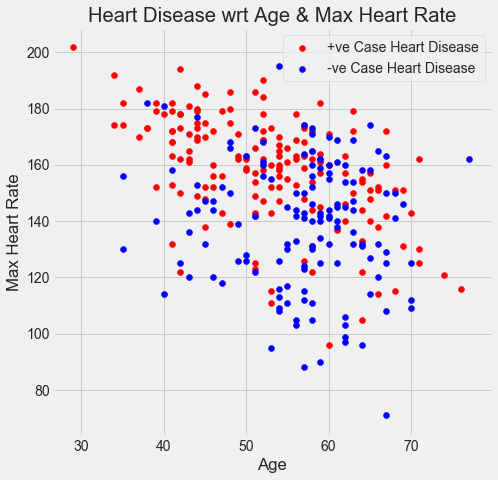

In [44]:
# Plot to describe relation between occurence of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(7, 7))

# Scatter plot for positive cases of Heart disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="red")

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="blue")

# Graph Description
plt.title("Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["+ve Case Heart Disease", "-ve Case Heart Disease"]);

Observing trends on +ve and -ve cases of Heart Disease individually

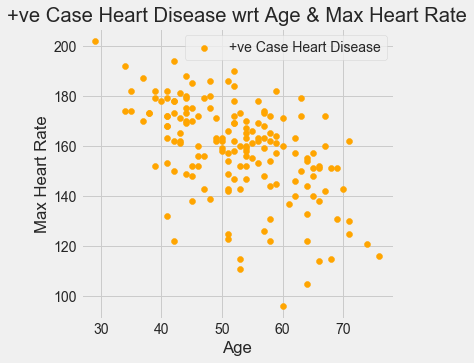

In [45]:
# Plot to describe relation between -ve case of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(5, 5))

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==1],
            dataset.thalach[dataset.target==1],
            c="orange")

# Graph Description
plt.title("+ve Case Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["+ve Case Heart Disease"]);

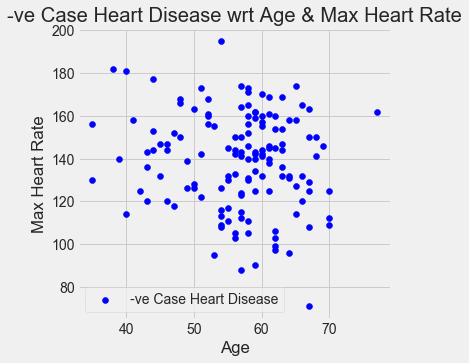

In [46]:
# Plot to describe relation between -ve case of Heart Disease wrt Age and Max Heart rate
plt.figure(figsize=(5, 5))

# Scatter plot for negative cases of Heart Disease as fx( age, maxHeartrate)
plt.scatter(dataset.age[dataset.target==0],
            dataset.thalach[dataset.target==0],
            c="blue")

# Graph Description
plt.title("-ve Case Heart Disease wrt Age & Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["-ve Case Heart Disease"]);

Out of all the variables with weak -ve correlation: ("restecg", "fbs", "chol", "trestbps").
"chol" and "trestbps" are real value fields, while "fbs" and "restecg" are categorical fields.
In order to derive valuable information out of "chol" and "trestbps", we need to observe their trends.
Observing the correlation of derived variables with the target variable.

C:\Users\palin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\palin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\palin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

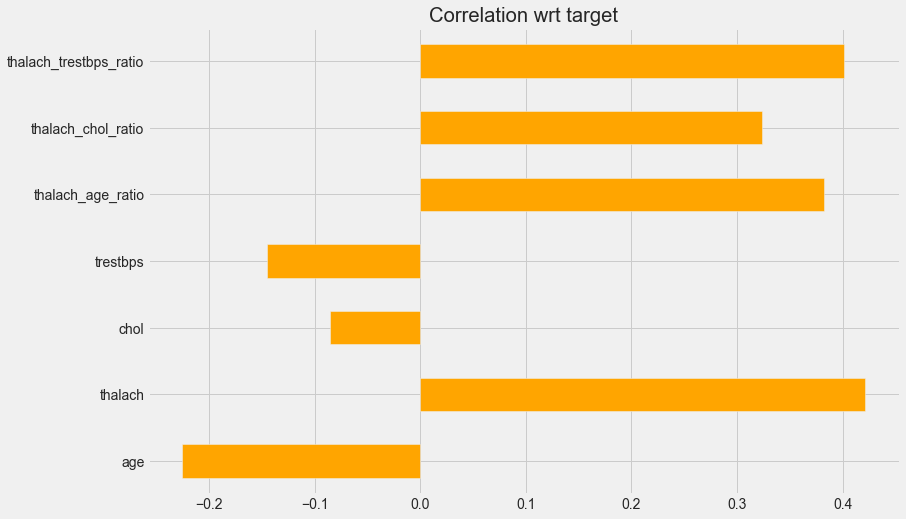

In [47]:
#print(realValue_columns)
dummyDataset = dataset[["target", "age", "thalach", "chol", "trestbps"]]
dummyDataset["thalach_age_ratio"] = (dummyDataset["thalach"]/ dummyDataset["age"])
dummyDataset["thalach_chol_ratio"] = (dummyDataset["thalach"]/ dummyDataset["chol"])
dummyDataset["thalach_trestbps_ratio"] = (dummyDataset["thalach"]/ dummyDataset["trestbps"])
dummyDataset.drop('target', axis = 1).corrwith(dummyDataset.target).plot(kind = 'barh', grid = True, figsize = (12, 8), title = "Correlation wrt target", color = "orange")

# Data Processing

Incorporating new derived variables and doing some pre-processing on the remainder variables, like Normalizing them.

In [48]:
dataset
"""
realValue_columns.remove("thalach_age_ratio");
realValue_columns.remove("thalach_chol_ratio");
realValue_columns.remove("thalach_trestbps_ratio")
realValue_columns
"""
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Splitting the Dataset into Train/Test datasets and training a Min-Max scaler on the training dataset. This trained scaler then is used to transform the Train/test datasets.

NOTE: The scaler is not trained on the entire dataset (train + test), as it would expose valuable information in the train dataset to the test data - which ccould compromise the performance of the model.

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

#incorporating the derived variables
dataset["thalach_age_ratio"] = (dataset["thalach"]/ dataset["age"])
dataset["thalach_chol_ratio"] = (dataset["thalach"]/ dataset["chol"])
dataset["thalach_trestbps_ratio"] = (dataset["thalach"]/ dataset["trestbps"])

# splitting the dataset into train-test data
X = dataset.drop('target', axis=1)
y = dataset.target

# splitting Training and Testing dataset in 70 - 30 ratio respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 99)

# realValue Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# training the scaler on the real valued columns for the training data
realValue_columns = realValue_columns + ["thalach_age_ratio", "thalach_chol_ratio", "thalach_trestbps_ratio"]
X_train[realValue_columns] = scaler.fit_transform( X_train[realValue_columns] )

#transforming the test dataset
X_test[realValue_columns] = scaler.transform( X_test[realValue_columns] )

C:\Users\palin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\palin\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\palin\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [50]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,thalach_age_ratio,thalach_chol_ratio,thalach_trestbps_ratio
53,0.232558,0,2,0.132075,0.000000,0,1,0.813084,0,0.096774,1,0,2,0.594873,1.000000,0.983545
223,0.511628,0,0,1.000000,0.347518,1,0,0.420561,1,0.645161,0,2,3,0.206126,0.186034,0.106671
212,0.116279,1,0,0.226415,0.184397,0,1,0.485981,0,0.193548,1,0,3,0.500850,0.371385,0.585268
85,0.767442,0,2,0.198113,1.000000,0,0,0.672897,0,0.258065,1,0,3,0.209295,0.000000,0.773300
80,0.162791,1,2,0.169811,0.257683,0,1,0.850467,0,0.000000,2,0,2,0.689151,0.451526,0.963210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.604651,1,0,0.292453,0.276596,0,0,0.495327,1,0.451613,1,1,3,0.200060,0.274505,0.531629
168,0.674419,1,0,0.339623,0.267139,0,0,0.551402,0,0.225806,1,1,3,0.196017,0.308166,0.534171
185,0.232558,1,0,0.169811,0.352246,0,0,0.607477,0,0.000000,2,1,2,0.473562,0.254738,0.750140
35,0.279070,0,2,0.452830,0.085106,0,0,0.672897,1,0.225806,0,0,2,0.473802,0.647834,0.530492


Definition of a helper function for printing classification report of performance of the ML model

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def modelPerformancedescribe(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        model_performance = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Model Training Result:\n*******************************************")
        print(f"Prediction Accuracy Score: {accuracy_score(y_train, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"Disease Prediction:\n{model_performance}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        model_performance = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Model Prediction Result on the Test Data:\n*******************************************")
        print(f"Prediction Accuracy Score: {accuracy_score(y_test, pred) * 100:.3f}%")
        print("_______________________________________________")
        print(f"Disease Prediction Report:\n{model_performance}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Train/Test of the Model

We will train and test our model based on the logistic regression algorithm and determine its performance.

In [52]:
from sklearn.linear_model import LogisticRegression

ml_model = LogisticRegression(solver='liblinear')
# using ‘liblinear’ solver as :
# it supports both L1 and L2 regularization
# with a dual formulation only for the L2 penalty.

ml_model.fit(X_train, y_train)

modelPerformancedescribe(ml_model, X_train, y_train, X_test, y_test, train=True)
modelPerformancedescribe(ml_model, X_train, y_train, X_test, y_test, train=False)

Model Training Result:
*******************************************
Prediction Accuracy Score: 85.083%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.876543   0.830000  0.850829    0.853272      0.852629
recall      0.806818   0.892473  0.850829    0.849646      0.850829
f1-score    0.840237   0.860104  0.850829    0.850170      0.850445
support    88.000000  93.000000  0.850829  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[71 17]
 [10 83]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 83.607%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.840909   0.833333  0.836066    0.837121      0.836438
recall      0.740000   0.902778  0.836066    0.821389      0.836066
f1

The logisitic regression model has an accuracy of 83.9% on the train dataset and 85.7% on the test data set. 
Let us explore other algorithms for better performance.

In [53]:
# save the logistic regression classifier

import pickle
# saving to a file
with open('HeartDisease_LogisticPredictor.pkl', 'wb') as f:
    pickle.dump(ml_model, f)

"""
# loading the model later
with open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:
    clf = pickle.load(f)
"""

"\n# loading the model later\nwith open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:\n    clf = pickle.load(f)\n"

Evaluating the performance of a model on a tree based algorithm: Decision tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier().fit(X_train, y_train)
modelPerformancedescribe(decisionTreeModel, X_train, y_train, X_test, y_test, train=True)
modelPerformancedescribe(decisionTreeModel, X_train, y_train, X_test, y_test, train=False)

Model Training Result:
*******************************************
Prediction Accuracy Score: 100.000%
_______________________________________________
Disease Prediction:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    88.0  93.0       1.0      181.0         181.0
_______________________________________________
Confusion Matrix: 
 [[88  0]
 [ 0 93]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 74.590%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.693878   0.780822  0.745902    0.737350      0.745189
recall      0.680000   0.791667  0.745902    0.735833      0.745902
f1-score    0.686869   0.786207  0.745902    0.736538   

The decision tree model overfits on the training data - not the ideal scenario we are looking for.
Probably, a Support Vector Machine can perform better without overfitting.

In [55]:
from sklearn.svm import SVC

# We will use a Support Vector Machine based model with RBF kernel
# Further, we will change the parameter of "gamma" and 'C' in the model argument to observe its performance

for this_gamma in [0.02, 0.03, 0.04, 0.05, 0.1, 0.5]:
    for this_C in [ 0.1, 0.2, 1, 1.5]:
        print("*******************************************\nParameters:: Gamma: {} , C: {}".format(this_gamma, this_C))
        svm_Model = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=True)
        modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=False)        

*******************************************
Parameters:: Gamma: 0.02 , C: 0.1
Model Training Result:
*******************************************
Prediction Accuracy Score: 76.243%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.924528   0.695312  0.762431    0.809920      0.806754
recall      0.556818   0.956989  0.762431    0.756904      0.762431
f1-score    0.695035   0.805430  0.762431    0.750233      0.751757
support    88.000000  93.000000  0.762431  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[49 39]
 [ 4 89]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 81.967%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.966667   0.771739  0.819672    0.869203      0

support    50.000000  72.000000  0.836066  122.000000    122.000000
_______________________________________________
Confusion Matrix: 
 [[35 15]
 [ 5 67]]

*******************************************
Parameters:: Gamma: 0.03 , C: 1.5
Model Training Result:
*******************************************
Prediction Accuracy Score: 84.530%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.857143   0.835052  0.845304    0.846097      0.845792
recall      0.818182   0.870968  0.845304    0.844575      0.845304
f1-score    0.837209   0.852632  0.845304    0.844920      0.845133
support    88.000000  93.000000  0.845304  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[72 16]
 [12 81]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 82.787%
_______________________________________________

Confusion Matrix: 
 [[35 15]
 [ 7 65]]

*******************************************
Parameters:: Gamma: 0.05 , C: 1
Model Training Result:
*******************************************
Prediction Accuracy Score: 85.083%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.858824   0.843750  0.850829    0.851287      0.851079
recall      0.829545   0.870968  0.850829    0.850257      0.850829
f1-score    0.843931   0.857143  0.850829    0.850537      0.850719
support    88.000000  93.000000  0.850829  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[73 15]
 [12 81]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 83.607%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.857143  

Model Training Result:
*******************************************
Prediction Accuracy Score: 87.293%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.873563   0.872340  0.872928    0.872952      0.872935
recall      0.863636   0.881720  0.872928    0.872678      0.872928
f1-score    0.868571   0.877005  0.872928    0.872788      0.872905
support    88.000000  93.000000  0.872928  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[76 12]
 [11 82]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 83.607%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.840909   0.833333  0.836066    0.837121      0.836438
recall      0.740000   0.902778  0.836066    0.821389      0.836066
f1

In [307]:
from sklearn.svm import SVC
import pickle
svm_Model = SVC(kernel = 'rbf', gamma = 0.5, C = 0.1).fit(X_train, y_train)
modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=True)
modelPerformancedescribe( svm_Model, X_train, y_train, X_test, y_test, train=False)

# saving SVM model to file
with open('HeartDisease_SVMPredictor.pkl', 'wb') as f:
    pickle.dump(ml_model, f)
"""
# loading the model later
with open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:
    clf = pickle.load(f)
"""

Model Training Result:
*******************************************
Prediction Accuracy Score: 86.740%
_______________________________________________
Disease Prediction:
                   0          1  accuracy   macro avg  weighted avg
precision   0.872093   0.863158  0.867403    0.867625      0.867502
recall      0.852273   0.881720  0.867403    0.866997      0.867403
f1-score    0.862069   0.872340  0.867403    0.867205      0.867347
support    88.000000  93.000000  0.867403  181.000000    181.000000
_______________________________________________
Confusion Matrix: 
 [[75 13]
 [11 82]]

Model Prediction Result on the Test Data:
*******************************************
Prediction Accuracy Score: 84.426%
_______________________________________________
Disease Prediction Report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.860465   0.835443  0.844262    0.847954      0.845698
recall      0.740000   0.916667  0.844262    0.828333      0.844262
f1

"\n# loading the model later\nwith open('HeartDisease_LogisticPredictor.pkl', 'rb') as f:\n    clf = pickle.load(f)\n"

The SVM model performs slightly better than the Logistic regression model - for parameters (gamma = 0.5 , C = 0.1), with train accuracy: 86.740% and test accuracy: 84.426%